# Étape 1 : Lire le fichier

In [1]:
with open('/content/attack_bruteforce_dictionary-ssh_ap.csv', 'r', encoding='utf-8') as fichier:
    lignes = fichier.readlines()

# Étape 2 : Compter les tentatives SSH


In [3]:
compteur_ssh = 0
ports_utilises = set()

print("Analyse de l'attaque brute force SSH...")
print("=" * 50)

for ligne in lignes[1:]:  # saute len tête
    if '192.168.1.100' in ligne and '"22"' in ligne:
        compteur_ssh += 1

        # Extraire le port source (pour voir la technique)
        parties = ligne.split(',')
        if len(parties) > 6:
            port_source = parties[6].replace('"', '')
            ports_utilises.add(port_source)

print(f"Tentatives SSH detectées : {compteur_ssh}")
print(f"Ports utilisés par l attaquant : {ports_utilises}")
print(f"Nombre de ports differents : {len(ports_utilises)}")

Analyse de l'attaque brute force SSH...
Tentatives SSH detectées : 86045
Ports utilisés par l attaquant : {'51580', '55582', '37202', '55248', '52168', '52556', '51598', '52050', '52158', '52224', '52208', '39684', '51578', '22', '52582', '51558', '39682', '39700', '52064', '55262', '52216', '37182', '51600', '52166', '53824', '39698', '53796', '55586', '55180', '39252', '52196', '39268', '51624', '52586', '55608', '47868', '47888', '51582', '52210', '47880', '57070', '52056', '47866', '39266', '52200', '57060', '55172', '51560', '52054', '39290', '55588', '52204', '53822', '39302', '51632', '52564', '55150', '57036', '47858', '55138', '55152', '37168', '55260', '53800', '55246', '52566', '39676', '55602', '55234', '52062', '51552', '37184', '37200', '57022', '53798', '57038'}
Nombre de ports differents : 76


# **Code avec Analyse détaillée**

In [4]:
import csv
from datetime import datetime, timedelta

### Stocker les timestamps des tentatives


In [5]:
timestamps = []
ports_attaquants = set()

print("ANALYSE AVANCÉE DE L'ATTAQUE")
print("=" * 60)

with open('/content/attack_bruteforce_dictionary-ssh_ap.csv', 'r', encoding='utf-8') as fichier:
    reader = csv.DictReader(fichier)

    for ligne in reader:
        # Détecter une tentative SSH
        if (ligne['ip.src'] == '192.168.1.100' and
            ligne['tcp.dstport'] == '22' and
            'SYN' in ligne.get('_ws.col.info', '')):

            # Enregistrer le moment de la tentative
            timestamp = float(ligne['frame.time_relative'])
            timestamps.append(timestamp)

            # Enregistrer le port utilisé
            if ligne['tcp.srcport']:
                ports_attaquants.add(ligne['tcp.srcport'])

ANALYSE AVANCÉE DE L'ATTAQUE


### Calculer les statistiques


In [6]:
if timestamps:
    duree_totale = max(timestamps) - min(timestamps)
    tentatives_par_minute = len(timestamps) / (duree_totale / 60) if duree_totale > 0 else 0

    print(f"STATISTIQUES DE L'ATTAQUE :")
    print(f"   - Tentatives totales : {len(timestamps)}")
    print(f"   - Durée de l attaque : {duree_totale:.2f} secondes")
    print(f"   - Vitesse : {tentatives_par_minute:.1f} tentatives/minute")
    print(f"   - Ports utilisés : {len(ports_attaquants)}")
    print(f"   - Premiere tentative : {min(timestamps):.2f}s")
    print(f"   - Dernière tentative : {max(timestamps):.2f}s")

    # Affichage
    print(f"   - Exemples de ports : {list(ports_attaquants)[:10]}")

STATISTIQUES DE L'ATTAQUE :
   - Tentatives totales : 75
   - Durée de l attaque : 118.92 secondes
   - Vitesse : 37.8 tentatives/minute
   - Ports utilisés : 75
   - Premiere tentative : 2.55s
   - Dernière tentative : 121.48s
   - Exemples de ports : ['51580', '55582', '37202', '55248', '52168', '52556', '51598', '52050', '52158', '52224']


# **Code pour détecter des patterns d'attaque**

In [7]:
def detecter_brute_force(fichier_csv):
    """Détecte une attaque brute force dans le fichier"""

    with open(fichier_csv, 'r') as f:
        lignes = f.readlines()

    # Dictionnaire pour suivre les tentatives
    tentatives_par_ip = {}

    for ligne in lignes[1:]:  # Ignorer l'en-tête
        if '"22"' in ligne:  # Traffic SSH
            parties = ligne.split(',')
            ip_source = parties[3].replace('"', '')  # ip.src
            ip_dest = parties[4].replace('"', '')    # ip.dst

            if ip_source not in tentatives_par_ip:
                tentatives_par_ip[ip_source] = []

            # Ajouter le timestamp
            timestamp = float(parties[1].replace('"', ''))
            tentatives_par_ip[ip_source].append(timestamp)

    # Analyser chaque IP
    print("RAPPORT DE SÉCURITÉ")
    print("=" * 50)

    for ip, timestamps in tentatives_par_ip.items():
        if len(timestamps) > 10:  # Seuil d'alerte
            duree = max(timestamps) - min(timestamps)
            taux = len(timestamps) / (duree / 60) if duree > 0 else 0

            print(f"ALERTE : {ip}")
            print(f"   - {len(timestamps)} tentatives SSH")
            print(f"   - Taux : {taux:.1f} tentatives/minute")
            print(f"   -Durée : {duree:.2f} secondes")

            if taux > 5:  # Seuil de brute force
                print(f"   DÉTECTION : ATTAQUE BRUTE FORCE CONFIRMÉE")
            print()

# Utilisation
detecter_brute_force('/content/attack_bruteforce_dictionary-ssh_ap.csv')

RAPPORT DE SÉCURITÉ
ALERTE : 192.168.1.100
   - 43012 tentatives SSH
   - Taux : 21604.6 tentatives/minute
   -Durée : 119.45 secondes
   DÉTECTION : ATTAQUE BRUTE FORCE CONFIRMÉE

ALERTE : 192.168.1.205
   - 43033 tentatives SSH
   - Taux : 21616.7 tentatives/minute
   -Durée : 119.44 secondes
   DÉTECTION : ATTAQUE BRUTE FORCE CONFIRMÉE



# **Code pour Visualiser l'attaque**

In [8]:
import matplotlib.pyplot as plt
import csv



### Collecter les données

In [9]:
timestamps = []
tentatives_cumulatives = []

with open('/content/attack_bruteforce_dictionary-ssh_ap.csv', 'r') as f:
    reader = csv.DictReader(f)
    compteur = 0

    for ligne in reader:
        if (ligne['ip.src'] == '192.168.1.100' and
            ligne['tcp.dstport'] == '22'):

            compteur += 1
            timestamps.append(float(ligne['frame.time_relative']))
            tentatives_cumulatives.append(compteur)


### Creer le graphique

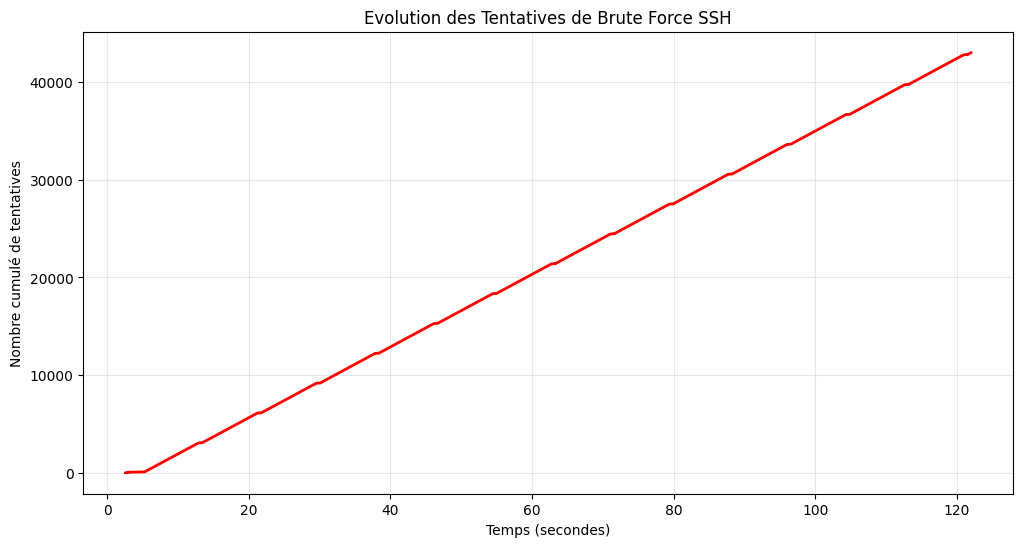

Graphique sauvegardé : attaque_brute_force.png


In [10]:
plt.figure(figsize=(12, 6))
plt.plot(timestamps, tentatives_cumulatives, 'r-', linewidth=2)
plt.title('Evolution des Tentatives de Brute Force SSH')
plt.xlabel('Temps (secondes)')
plt.ylabel('Nombre cumulé de tentatives')
plt.grid(True, alpha=0.3)
plt.savefig('attaque_brute_force.png')
plt.show()

print(f"Graphique sauvegardé : attaque_brute_force.png")